In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


#my_cmap=plt.cm.viridis
#my_cmap=plt.cm.plasma
my_cmap=plt.cm.cividis

In [2]:
def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
  Source: https://stackoverflow.com/questions/7404116/defining-the-midpoint-of-a-colormap-in-matplotlib
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    matplotlib.colormaps.register(cmap=newcmap)

    return newcmap

cmap = shiftedColorMap(my_cmap, midpoint=0.2, name='shifted_cmap')

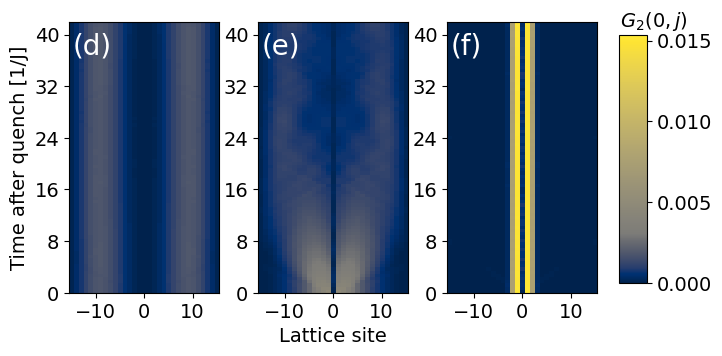

In [3]:
M=31

data0 = np.loadtxt("TevG2s_Ns31N3U40qU-40V0.txt",usecols=range(1,32))
data197 = np.loadtxt("TevG2s_Ns31N3U40qU-40V-1.97.txt",usecols=range(1,32))
data8 = np.loadtxt("TevG2s_Ns31N3U40qU-40V-8.txt",usecols=range(1,32))
data0 = data0/3/3
data197 = data197/3/3
data8 = data8/3/3
minVal = min(data0.min(),data197.min(),data8.min())
maxVal = max(data0.max(),data197.max(),data8.max())

fig, ax = plt.subplots(1,3)
fig.set_size_inches(18/2.54, 9/2.54)


im0 = ax[0].imshow(data0,vmin=0,vmax=maxVal,interpolation='none',cmap='shifted_cmap',origin='lower',aspect="auto",extent=[-int(M/2)-0.5,int(M/2)+0.5,0,42])  
im1 = ax[1].imshow(data197,vmin=0,vmax=maxVal,interpolation='none',cmap='shifted_cmap',origin='lower',aspect="auto",extent=[-int(M/2)-0.5,int(M/2)+0.5,0,42])  
im2 = ax[2].imshow(data8,vmin=0,vmax=maxVal,interpolation='none',cmap='shifted_cmap',origin='lower',aspect="auto",extent=[-int(M/2)-0.5,int(M/2)+0.5,0,42])  

ax[0].set_xticks([-10,0,10])
ax[1].set_xticks([-10,0,10])
ax[2].set_xticks([-10,0,10])

ax[0].set_yticks([0,8,16,24,32,40])
ax[1].set_yticks([0,8,16,24,32,40])
ax[2].set_yticks([0,8,16,24,32,40])
ax[0].text(-M/2*0.95,37,"(d)",fontsize=20,c='white')
ax[1].text(-M/2*0.95,37,"(e)",fontsize=20,c='white')
ax[2].text(-M/2*0.95,37,"(f)",fontsize=20,c='white')

ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[2].tick_params(axis='both', which='major', labelsize=14)
ax[2].tick_params( bottom='off', left='off', labelbottom='on')

ax[1].set_xlabel("Lattice site",fontsize=14)
ax[0].set_ylabel("Time after quench [1/J]",fontsize=14)

plt.tight_layout(w_pad=0.8)

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.22, 0.04, 0.7])

cbar = fig.colorbar(mappable=im1, cax=cbar_ax,ticks=[0, 0.005, 0.01,0.015])

cbar.ax.set_title(' $\;\;\;\;\;\;\;G_2(0,j)$',fontsize=14)
cbar.ax.tick_params(axis='both', which='major', labelsize=14)

plt.savefig("Tev_3at_G2_cs.pdf",format='pdf',dpi=300, transparent=None, bbox_inches = "tight")
plt.show()

In [4]:
data0 = np.loadtxt("TevNis_Ns31N3U40qU-40V0.txt",usecols=range(1,32))
data197 = np.loadtxt("TevNis_Ns31N3U40qU-40V-1.97.txt",usecols=range(1,32))
data8 = np.loadtxt("TevNis_Ns31N3U40qU-40V-8.txt",usecols=range(1,32))

minVal = min(data0.min(),data197.min(),data8.min())
maxVal = max(data0.max(),data197.max(),data8.max())

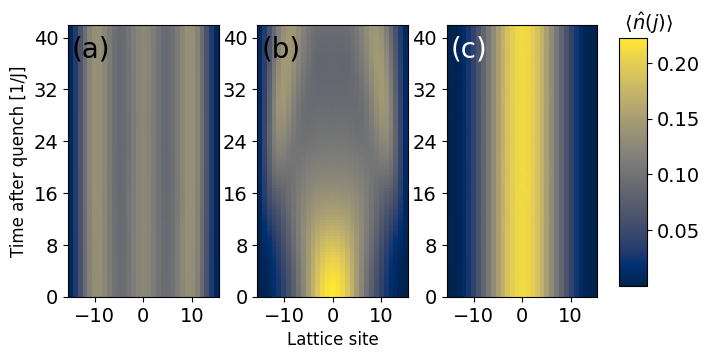

In [5]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(18/2.54, 9/2.54)

im0 = ax[0].imshow(data0,interpolation='none',vmin=minVal,vmax=maxVal,cmap=my_cmap,origin='lower',aspect="auto",extent=[-int(M/2)-0.5,int(M/2)+0.5,0,42])  
im1 = ax[1].imshow(data197,interpolation='none',vmin=minVal,vmax=maxVal,cmap=my_cmap,origin='lower',aspect="auto",extent=[-int(M/2)-0.5,int(M/2)+0.5,0,42])  
im2 = ax[2].imshow(data8,interpolation='none',vmin=minVal,vmax=maxVal,cmap=my_cmap,origin='lower',aspect="auto",extent=[-int(M/2)-0.5,int(M/2)+0.5,0,42])  

ax[0].set_xticks([-10,0,10])
ax[1].set_xticks([-10,0,10])
ax[2].set_xticks([-10,0,10])

ax[0].set_yticks([0,8,16,24,32,40])
ax[1].set_yticks([0,8,16,24,32,40])
ax[2].set_yticks([0,8,16,24,32,40])
ax[0].text(-M/2*0.95,37,"(a)",fontsize=20,c='black')
ax[1].text(-M/2*0.95,37,"(b)",fontsize=20,c='black')
ax[2].text(-M/2*0.95,37,"(c)",fontsize=20,c='white')

ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[2].tick_params(axis='both', which='major', labelsize=14)
ax[1].tick_params(axis='y', which='major', labelsize=14)
ax[2].tick_params(axis='y', which='major', labelsize=14)
ax[2].tick_params( bottom='off', left='off', labelbottom='on')

ax[1].set_xlabel("Lattice site",fontsize=12)
ax[0].set_ylabel("Time after quench [1/J]",fontsize=12)

plt.tight_layout(w_pad=0.8)

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.22, 0.04, 0.7])
cbar = fig.colorbar(mappable=im1, cax=cbar_ax,ticks=[0, 0.05, 0.1, 0.15,0.2])
cbar.ax.set_title(r'$\;\;\;\;\;\;\langle \hat{n}(j)\rangle$',fontsize=14)
cbar.ax.tick_params(axis='both', which='major', labelsize=14)

plt.savefig("./Tev_3at_nis.pdf",format='pdf',dpi=300, transparent=None, bbox_inches = "tight")
plt.show()